# Example 3.3: Response cross-spectral density matrix

## Define structural properties
In this example we will consider a two story shear frame subjected to two correlated stochastic loads. We start by defining the equation of motion for the shear frame

$$ \mathbf{M} \ddot{\mathbf{y}} + \mathbf{C} \dot{\mathbf{y}}+ \mathbf{K} \mathbf{y} = \mathbf{X}(t) $$


In [1]:
# Import necessary packages and modules
import numpy as np
from scipy import linalg as spla
from scipy import stats as sps
from matplotlib import pyplot as plt
# Define structural properties
m = 1.0 # Mass of each story
k = 100.0 # Stiffness
MM = np.eye(2)*m # Mass matrix
KK = np.array(([[2, -1], [-1, 1]]))*k # Stiffness matrix

we then calculate the natural frequencies and mode shapes by solving the generalized eigenvalue problem.

$$ \left( \mathbf{K} - \lambda \mathbf{M} \right) \Phi = \mathbf{0} $$

In [2]:
# Calculate modes and frequencies
lam,v = spla.eig(KK,MM) #Solve eigenvalue problem using scipy 
#lam = np.reshape(lam, (1, lam.shape[0]))
v[:,0] = v[:,0]/np.max(v[:,0]) #Normalize the eigenvector
v[:,1] = v[:,1]/np.max(v[:,1])
f = np.real(lam)**0.5/2/np.pi #Natural frequencies in Hz
omega = f*2*np.pi # Natural frequencies in rad/s

We assume thet the damping can be modelled using Rayleigh damping and assign 5 per cent damping for the two vibration modes. Since we only have two degrees of freedom this means that we get the two damping ratios that we assign for the two modes. Rayleigh damping is defined as

$$ \mathbf{C} = \alpha_1 \mathbf{M} + \alpha_2 \mathbf{K} $$

The factors $\alpha_1$ and $\alpha_2$ are defined as

$$ \alpha_{1} = 2 \omega_{1}\omega_2 \frac{\left(\zeta_2\omega_{1}-\zeta_{1}\omega_2 \right)} {\omega_{1}^2-\omega_2^2} $$

$$ \alpha_2 = 2 \frac{\zeta_1 \omega_1 -\zeta_2\omega_2}{\omega_1^2-\omega_2^2}    $$


In [3]:
# Rayleigh damping
zeta = np.array(([5.0, 5.0]))/100
alpha1 = 2*omega[0]*omega[1]*(zeta[1]*omega[0]-zeta[0]*omega[1])/(omega[0]**2-omega[1]**2)
alpha2 = 2*(zeta[0]*omega[0]-zeta[1]*omega[1])/(omega[0]**2-omega[1]**2)
CC = alpha1*MM + alpha2*KK

## Define the cross-spectral density matrix of the loads
The system has two degrees of freedom and the two stochastic loads are defined by the auto spectral density matrix

$$ \mathbf{S_X}(\omega) = \left[ \begin{array}{c c}
{S _{X_1}(\omega)} & {S _{X_1X_2}(\omega)}\\
{S_{X_2X_1}(\omega)}&{S_{X_2}(\omega)}
\end{array} \right] $$

The components in the cross-spectral density matrix is defined as follows

$$ S_{X_1}(\omega)= \left\{ \begin{array} {c} 1 \quad  |\omega|\le 25 \\ 0 \quad \omega > 25 \end{array} \right. $$

$$ S_{X_2}(\omega)= \left\{ \begin{array} {c} 1 \quad  |\omega|\le 25 \\ 0 \quad \omega > 25 \end{array} \right. $$

$$ S_{X_{1}X_{2}}(\omega)=S_{X_{2}X_{1}}(\omega) =\left\{ \begin{array} {c} -0.5 \quad  |\omega|\le 25 \\ 0 \quad \omega > 25 \end{array} \right. $$

Note that the elements on the diagonal of the matrix are auto-spectral densities, while the off-diagonal terms are cross-spectral densities. The python implementation is shown below.

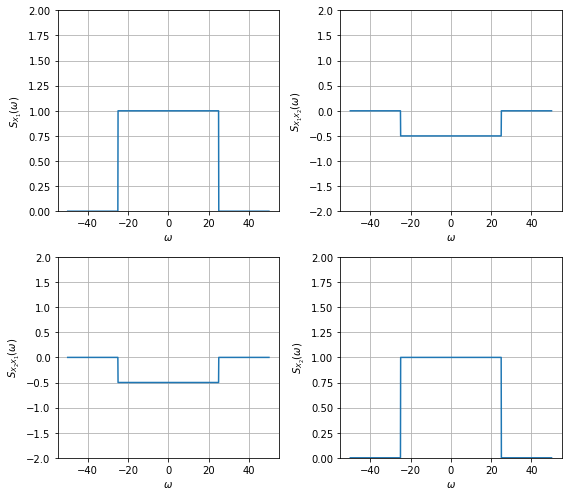

In [79]:

w = np.linspace(-50.0,50.0,1000) #Frequency axis

SxSx = np.zeros((2,2,w.shape[0])) # Initialize cross-spectral density matrix

SxSx[0,0,np.abs(w)<25] = 1
SxSx[1,1,np.abs(w)<25] = 1
SxSx[0,1,np.abs(w)<25] = -0.5
SxSx[1,0,np.abs(w)<25] = -0.5

fig, axs = plt.subplots(2,2,figsize=(8,7))
ax1 = axs[0,0]
ax1.plot(w,SxSx[0,0,:])
ax1.set_ylim(0,2)
ax1.set_ylabel(r'$S_{X_1}(\omega)$')
ax1.set_xlabel(r'$\omega$')
ax1.grid('True')

ax2 = axs[0,1]
ax2.plot(w,SxSx[0,1,:])
ax2.set_ylim(-2,2)
ax2.set_ylabel(r'$S_{X_1X_2}(\omega)$')
ax2.set_xlabel(r'$\omega$')
ax2.grid('True')

ax3 = axs[1,0]
ax3.plot(w,SxSx[1,0,:])
ax3.set_ylim(-2,2)
ax3.set_ylabel(r'$S_{X_2X_1}(\omega)$')
ax3.set_xlabel(r'$\omega$')
ax3.grid('True')

ax4 = axs[1,1]
ax4.plot(w,SxSx[1,1,:])
ax4.set_ylim(0,2)
ax4.set_ylabel(r'$S_{X_2}(\omega)$')
ax4.set_xlabel(r'$\omega$')
ax4.grid('True')

plt.tight_layout()

## Calculate the frequency-response matrix
The frequency response matrix is defined as

$$\mathbf{H}(\omega) = \left[-\omega^2 \mathbf{M} + i\omega \mathbf{C} + \mathbf{K}   \right]^{-1}  $$

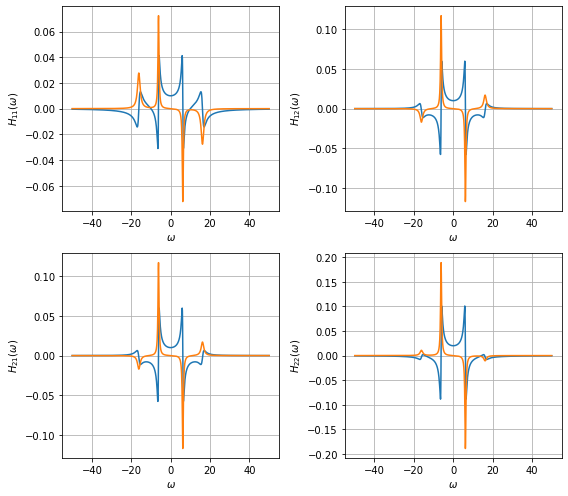

In [80]:
HH = np.zeros((2,2,w.shape[0]),dtype=complex)
for k in range(w.shape[0]):
    HH[:,:,k] = np.linalg.inv(-w[k]**2*MM + 1j*w[k]*CC + KK)

fig, axs = plt.subplots(2,2,figsize=(8,7))
ax1 = axs[0,0]
ax1.plot(w,np.real(HH[0,0,:]))
ax1.plot(w,np.imag(HH[0,0,:]))
ax1.set_ylabel(r'$H_{11}(\omega)$')
ax1.set_xlabel(r'$\omega$')
ax1.grid('True')

ax2 = axs[0,1]
ax2.plot(w,np.real(HH[0,1,:]))
ax2.plot(w,np.imag(HH[0,1,:]))
ax2.set_ylabel(r'$H_{12}(\omega)$')
ax2.set_xlabel(r'$\omega$')
ax2.grid('True')

ax3 = axs[1,0]
ax3.plot(w,np.real(HH[1,0,:]))
ax3.plot(w,np.imag(HH[1,0,:]))
ax3.set_ylabel(r'$H_{21}(\omega)$')
ax3.set_xlabel(r'$\omega$')
ax3.grid('True')

ax4 = axs[1,1]
ax4.plot(w,np.real(HH[1,1,:]))
ax4.plot(w,np.imag(HH[1,1,:]))
ax4.set_ylabel(r'$H_{22}(\omega)$')
ax4.set_xlabel(r'$\omega$')
ax4.grid('True')

plt.tight_layout()

## Calculate the response cross-spectral density matrix

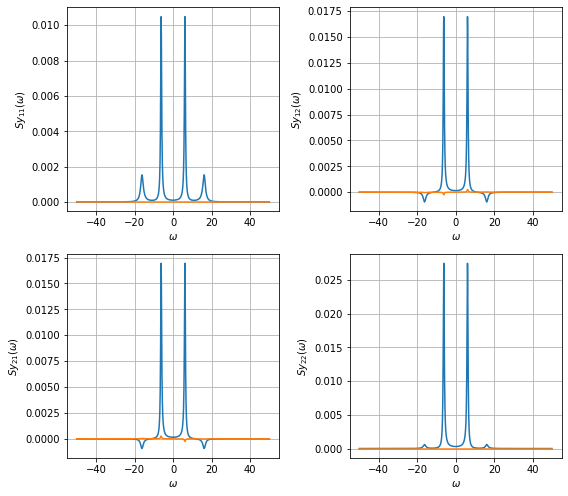

In [81]:
SySy = np.zeros((2,2,w.shape[0]),dtype=complex)
for k in range(w.shape[0]):
    SySy[:,:,k] = np.matmul(np.conj(HH[:,:,k]),np.matmul(SxSx[:,:,k],HH[:,:,k].T))
    
fig, axs = plt.subplots(2,2,figsize=(8,7))
ax1 = axs[0,0]
ax1.plot(w,np.real(SySy[0,0,:]))
ax1.plot(w,np.imag(SySy[0,0,:]))
ax1.set_ylabel(r'$Sy_{11}(\omega)$')
ax1.set_xlabel(r'$\omega$')
ax1.grid('True')

ax2 = axs[0,1]
ax2.plot(w,np.real(SySy[0,1,:]))
ax2.plot(w,np.imag(SySy[0,1,:]))
ax2.set_ylabel(r'$Sy_{12}(\omega)$')
ax2.set_xlabel(r'$\omega$')
ax2.grid('True')

ax3 = axs[1,0]
ax3.plot(w,np.real(SySy[1,0,:]))
ax3.plot(w,np.imag(SySy[1,0,:]))
ax3.set_ylabel(r'$Sy_{21}(\omega)$')
ax3.set_xlabel(r'$\omega$')
ax3.grid('True')

ax4 = axs[1,1]
ax4.plot(w,np.real(SySy[1,1,:]))
ax4.plot(w,np.imag(SySy[1,1,:]))
ax4.set_ylabel(r'$Sy_{22}(\omega)$')
ax4.set_xlabel(r'$\omega$')
ax4.grid('True')

plt.tight_layout()

$S_{y_{11}}$ and $S_{y_{22}}$ are the auto-spectral density of the response in degrees of freedom 1 and 2. It is seen that the auto-spectral densities are symmetric about the vertical axis and that they are real functions of frequency. The auto-spectral density is always positive since negative variance is impossible. No frequency component can contribute to negative variance. The variance of the response process is the integral of the auto-spectral density. The auto-spectral density thus illustrates which frequency range contributes to the variance of the response. If we first consider the response in the first degree of freedom, we see that the first mode contributes most to the dynamic response, but the second mode is also clearly present. Both modes are visible in the auto-spectral density of the dynamic response in the second degree of freedom. Still, we see that the response in mode 1 is huge compared to the second mode since the second peak is barely visible. 

The variance of the dynamic response in the first and second degrees of freedom is the integral of the cross-spectral density functions. The figure shows that the cross-spectral densities are complex functions of frequency. The real part is symmetric about the vertical axis, while the imaginary part is asymmetric. These symmetries ensure that the integral of the cross-spectral density is real and thus that the covariance of the responses is a real number. We can also observe that the real part of $S_{y1y2}$ is equal to the real part of $S_{y2y1}$ while the imaginary part has the opposite sign. A cross-spectral density matrix is always a Hermitian matrix, which implies that it is equal to its conjugate transpose.  We also see that the peak corresponding to the first mode contributes with positive covariance while the peak corresponding to the second mode contributes with negative covariance. 

Study how the response cross-spectral density matrix depends on the covariance of the stochastic loads.  

## Calculate the variances and covariance
The variances of covariance of the response in the first and second degrees of freedom is obtained by integrating the cross-spectral density matrix. These define tha joint probability density function of the response.



In [111]:
covariance_matrix = np.trapz(SySy,w)

sigma_y1 = np.real(covariance_matrix[0,0])**0.5
sigma_y2 = np.real(covariance_matrix[1,1])**0.5
rho_y1_y2 = np.real(covariance_matrix[0,1])/np.real(covariance_matrix[0,0])**0.5/np.real(covariance_matrix[1,1])**0.5

